# Exercise 3-1

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.
Plot the actual and biased distributions, and compute their means.

In [50]:
# TAKEN FROM CHAP03EX - IMPORT

from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot
import sys

In [2]:
# READ FILE
resp = nsfg.ReadFemResp()

In [3]:
# PMF CLASS PROVIDED BY THINKSTATS2 - REFERRED TO PG 26
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

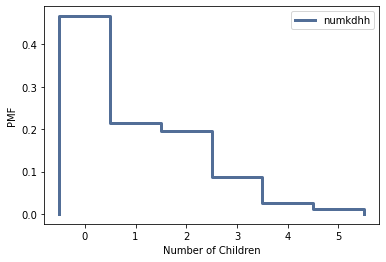

In [5]:
# CONSTRUCT ACTUAL DISTRIBUTION - REFERRED TO PG 29
thinkplot.Pmf(pmf)
# LABELS
thinkplot.Config(xlabel='Number of Children',
                ylabel='PMF')

In [12]:
# This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.
# REFERRED TO CHAP03EX IN[21] & PG 32
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

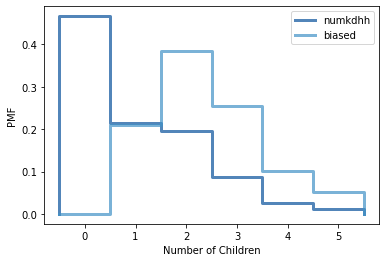

<Figure size 576x432 with 0 Axes>

In [13]:
# PLOT BIASED DISTRIBUTION - REFERRRED TO G 32
# FIND BIAS PMF
biased_pmf = BiasPmf(pmf, label='biased')
# PLOT COMPARISON
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
# LABELS
thinkplot.Show(xlabel='Number of Children',
              ylabel='PMF')

In [14]:
#MEAN COMPARISON - REFERRED TO PG 32
print('mean', pmf.Mean())
print('biased mean', biased_pmf.Mean())

mean 1.024205155043831
biased mean 2.403679100664282


# Exercise 3-2

In "Summarizing Distributions" on page 22 we computed the mean of a sample by adding up the elements and dividing it by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:
(forumula)
where the x(subtext)i are the unique values in the PMF and p(sub)i = PMF (x(sub)i). Similarly you can compute variance like this:
(formula)
Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consisten with the methods Mean and Var provided by Pmf.

In [17]:
# DEFINE MEAN FUNCTION - REFERRED TO PG 33 + 36
def PmfMean(pmf):
    mean = 0.0

    for x, p in pmf.Items():
        mean += x * p
        
    return mean

In [18]:
PmfMean(pmf)

1.024205155043831

In [15]:
print('mean', pmf.Mean())

mean 1.024205155043831


In [60]:
# DEFINE VAR FUNCTION - REFERRED TO PG 36
def PmfVar(pmf):
    var = 0.0
    mean = pmf.Mean()

    for x, p in pmf.Items():
        var += p * (x - mean) ** 2
        
    return PmfVar

In [61]:
PmfVar(pmf)

<function __main__.PmfVar(pmf)>

In [47]:
print('variance', pmf.Var())

variance 1.4128643263531195
